In [1]:
from nilearn import datasets, plotting
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Total number of nodes (assuming AAL116)
n_nodes = 116

# Define group indices
visual = [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
somatomotor = [0, 1, 16, 17, 18, 19, 56, 57, 68, 69]
dorsal_attention = [58, 59, 60, 61, 6, 7]
ventral_attention = [28, 29, 62, 63]
limbic = [36, 37, 38, 39, 40, 41, 24, 25, 20, 21]
frontoparietal = [2, 3, 6, 7, 10, 11, 12, 13]
default_mode = [22, 23, 32, 33, 34, 35, 64, 65, 66, 67, 84, 85]

ppmi_corr_weights_gcn = np.array([0.2647, 0.5496, 0.5686, 0.3007, 0.4413, 0.5150, 0.6407, 0.5708, 0.6927,
        0.4256, 0.3680, 0.2199, 0.2855, 0.4672, 0.6344, 0.3110, 0.5701, 0.1994,
        0.3694, 0.6602, 0.6997, 0.3491, 0.5677, 0.1850, 0.5210, 0.4728, 0.3261,
        0.4483, 0.2950, 0.1117, 0.4002, 0.5016, 0.6433, 0.3956, 0.5223, 0.6669,
        0.7116, 0.2322, 0.1503, 0.6669, 0.5941, 0.5204, 0.3898, 0.4994, 0.2264,
        0.5534, 0.2844, 0.4649, 0.5823, 0.5101, 0.3800, 0.6226, 0.5013, 0.3718,
        0.2963, 0.4067, 0.5097, 0.3826, 0.6297, 0.2042, 0.5700, 0.3802, 0.3797,
        0.5243, 0.4583, 0.8813, 0.1507, 0.5672, 0.5162, 0.3138, 0.9021, 0.5940,
        0.5432, 0.4864, 0.4398, 0.4591, 0.2930, 0.3516, 0.3890, 0.6159, 0.8022,
        0.4039, 0.1465, 0.5668, 0.3428, 0.5229, 0.4724, 0.1801, 0.4670, 0.4684,
        0.3721, 0.5966, 0.2920, 0.5576, 0.2436, 0.3661, 0.3985, 0.7704, 0.4611,
        0.3163, 0.7698, 0.6109, 0.2165, 0.6398, 0.3965, 0.3057, 0.7538, 0.7932,
        0.1051, 0.5798, 0.6073, 0.1571, 0.1697, 0.2260, 0.2439, 0.1671])
ppmi_asym_weights_gcn = [0.4643, 0.2484, 0.4363, 0.3053, 0.9432, 0.6958, 0.6792, 0.2790, 0.5778,
        0.6840, 0.6001, 0.9193, 0.8081, 0.3899, 0.6096, 0.3207, 0.5493, 0.7275,
        0.6369, 0.3428, 0.4374, 0.6044, 0.3071, 0.7273, 0.7234, 0.7495, 0.4991,
        0.6991, 0.2601, 0.8854, 0.3218, 0.3271, 0.5204, 1.0960, 0.8194, 0.3120,
        0.5850, 0.5911, 0.9846, 0.2969, 0.5225, 0.8726, 0.2801, 0.6963, 0.7208,
        0.5961, 0.6462, 0.8318, 0.7194, 0.7387, 0.7929, 0.8086, 0.2883, 0.6069,
        0.5075, 0.7585, 0.9883, 0.6403]
ppmi_asym_weights_gcn = np.array([weight for weight in ppmi_asym_weights_gcn for _ in range(2)])
adni_corr_weights_gcn = np.array([0.4204, 0.2743, 0.5149, 0.5044, 0.4371, 0.4400, 0.4278, 0.3989, 0.2438,
        0.5940, 0.3947, 0.3971, 0.3473, 0.3337, 0.2999, 0.3333, 0.1127, 0.4590,
        0.3419, 0.4820, 0.3848, 0.5399, 0.4118, 0.6630, 0.4081, 0.4000, 0.4808,
        0.3761, 0.3704, 0.3724, 0.4189, 0.5987, 0.3720, 0.3390, 0.4794, 0.4181,
        0.5996, 0.4291, 0.2197, 0.4669, 0.2470, 0.4452, 0.4930, 0.5619, 0.4077,
        0.3299, 0.4972, 0.4749, 0.2382, 0.4992, 0.5566, 0.5001, 0.2977, 0.1841,
        0.6158, 0.4691, 0.4980, 0.3015, 0.4605, 0.3948, 0.3360, 0.3780, 0.3898,
        0.5141, 0.2730, 0.4334, 0.3938, 0.4623, 0.4654, 0.6258, 0.4244, 0.1204,
        0.5342, 0.4250, 0.2880, 0.5248, 0.2548, 0.0607, 0.2300, 0.2857, 0.6471,
        0.3912, 0.3835, 0.5847, 0.5478, 0.4392, 0.4517, 0.5305, 0.4267, 0.5494,
        0.3638, 0.3681, 0.4255, 0.4903, 0.5238, 0.1638, 0.3714, 0.2075, 0.5894,
        0.4304, 0.3261, 0.3510, 0.4828, 0.3399, 0.3302, 0.4900, 0.4477, 0.4713,
        0.5189, 0.3028, 0.4884, 0.4575, 0.3786, 0.4866, 0.2484, 0.4730])
adni_asym_weights_gcn = [0.4114, 0.5765, 0.4476, 0.5278, 0.5487, 0.7032, 0.8646, 0.5713, 0.4669,
        0.4284, 0.5993, 0.4784, 0.4182, 0.3306, 0.5395, 0.3886, 0.8994, 0.3384,
        0.4277, 0.5410, 0.3327, 0.7753, 0.5993, 0.5422, 0.3432, 0.6261, 0.4142,
        0.5367, 0.5814, 0.7152, 0.6535, 0.4311, 0.5202, 0.3578, 0.4692, 0.3865,
        0.7439, 0.4723, 0.6795, 0.5796, 0.5461, 0.6272, 0.2384, 0.5384, 0.4048,
        0.5309, 0.3392, 0.5517, 0.5597, 0.7916, 0.3300, 0.4986, 0.6269, 0.6365,
        0.4856, 0.4393, 0.7036, 0.5315]
adni_asym_weights_gcn = np.array([weight for weight in adni_asym_weights_gcn for _ in range(2)])
adni_multi_corr_weights_gcn = np.array([0.8448, 1.3131, 1.0218, 1.1304, 1.2544, 0.9941, 1.7469, 0.8729, 1.0500,
        1.0164, 1.0738, 0.8671, 1.0512, 0.9199, 0.8855, 1.1163, 1.2969, 0.7895,
        1.3903, 1.2258, 1.1477, 0.9438, 0.8805, 1.8643, 1.0585, 1.3007, 1.1490,
        0.6491, 1.2196, 0.7996, 1.0797, 1.3687, 1.6296, 1.0231, 0.8162, 1.3128,
        1.0166, 0.8103, 0.7048, 1.1544, 1.1595, 1.0264, 0.6286, 1.0910, 1.1538,
        1.3811, 1.1217, 0.9854, 0.6219, 0.8549, 0.8376, 1.0243, 0.9294, 0.8974,
        1.0375, 0.8400, 1.0014, 0.9122, 0.6731, 1.3099, 1.1892, 0.8324, 0.7129,
        1.4286, 0.9211, 1.1677, 1.3026, 0.6205, 0.7905, 1.0721, 1.0522, 1.3026,
        0.7796, 1.1067, 0.9213, 1.4133, 1.2699, 1.1120, 1.0750, 0.4671, 1.0083,
        0.9646, 1.0016, 0.6576, 1.2544, 1.0459, 1.0322, 0.9897, 1.3696, 1.0284,
        0.6197, 1.1036, 1.2048, 1.1227, 1.1877, 0.9741, 0.7334, 0.9562, 1.2194,
        1.0093, 1.1395, 1.4386, 1.5056, 1.3527, 0.7975, 1.4791, 1.2526, 0.9580,
        0.8223, 1.0110, 1.2867, 0.8082, 0.9877, 1.2908, 1.1158, 0.5136])
adni_multi_asym_weights_gcn = [0.6997, 0.7493, 0.8562, 0.8555, 0.8128, 0.7443, 0.4176, 0.0236, 0.5377,
        0.5342, 1.1772, 0.8848, 1.1176, 0.6573, 0.8407, 1.2111, 0.1832, 0.9030,
        0.7945, 0.5310, 0.6280, 0.6516, 0.4246, 0.6407, 0.7072, 0.9021, 0.6052,
        0.5885, 0.6592, 1.1270, 0.5568, 0.5773, 0.6619, 1.2394, 0.6820, 1.0185,
        0.1865, 0.7323, 1.2009, 0.7153, 0.3985, 1.0860, 0.5555, 0.8124, 1.1934,
        0.3405, 0.8554, 0.7632, 0.6960, 0.7850, 0.7427, 0.9731, 0.6566, 0.5846,
        0.7142, 0.8641, 0.8566, 0.6002]
adni_multi_asym_weights_gcn = np.array([weight for weight in adni_multi_asym_weights_gcn for _ in range(2)])

node_coords = plotting.find_parcellation_cut_coords(datasets.fetch_atlas_aal()['maps'])

In [49]:
# Create a function to plot the brain with attention weights
def plot_brain_weights(node_sizes, fig, ax, title):
    # Initialize color array for all nodes (default is white)
    node_colors = np.zeros(n_nodes)

    # Assign unique colors (arbitrary values) to each group
    node_colors[visual] = 1  # Visual group
    node_colors[somatomotor] = 2  # Somatomotor group
    node_colors[dorsal_attention] = 3  # Dorsal Attention group
    node_colors[ventral_attention] = 4  # Ventral Attention group
    node_colors[limbic] = 5  # Limbic group
    node_colors[frontoparietal] = 6  # Frontoparietal group
    node_colors[default_mode] = 7  # Default Mode group

    # Normalize node sizes to a range [1, 10] and apply exponential scaling
    scaler = MinMaxScaler(feature_range=(1, 10))
    node_sizes = scaler.fit_transform(node_sizes.reshape(-1, 1)).flatten() ** 1.75

    # Filter out nodes where node_colors == 0
    valid_indices = node_colors != 0
    node_coords_filtered = node_coords[valid_indices]
    node_sizes_filtered = node_sizes[valid_indices]
    node_colors_filtered = node_colors[valid_indices]

    # Define color mapping (using a colormap from matplotlib)
    cmap = plt.cm.get_cmap('Set1', 7)

    # Create the plot for the nodes
    # plotting.plot_markers(node_colors_filtered, node_coords_filtered, node_size=node_sizes_filtered, 
    #                                 node_cmap=cmap, figure=fig, axes=ax, colorbar=False, output_file='../../figures/attention_weights/' + title + '.png')
    plotting.plot_markers(node_colors_filtered, node_coords_filtered, node_size=node_sizes_filtered, 
                                    node_cmap=cmap, figure=fig, axes=ax, colorbar=False, title=title)

    # # Set limits for the axes to zoom in on the plot (adjust based on how much you want to zoom)
    # ax.set_xlim([min(node_coords_filtered[:, 0])-1, max(node_coords_filtered[:, 0])+1])
    # ax.set_ylim([min(node_coords_filtered[:, 1])-10, max(node_coords_filtered[:, 1])+10])

    # Remove x and y axes (hide ticks, labels, etc.)
    ax.set_axis_off()

C:\Users\mosta\AppData\Local\Temp\ipykernel_32308\1999177363.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1', 7)
C:\Users\mosta\AppData\Local\Temp\ipykernel_32308\1999177363.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1', 7)
C:\Users\mosta\AppData\Local\Temp\ipykernel_32308\1999177363.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1', 7)
C:\Users\mosta\AppData\Local\Temp\ipy

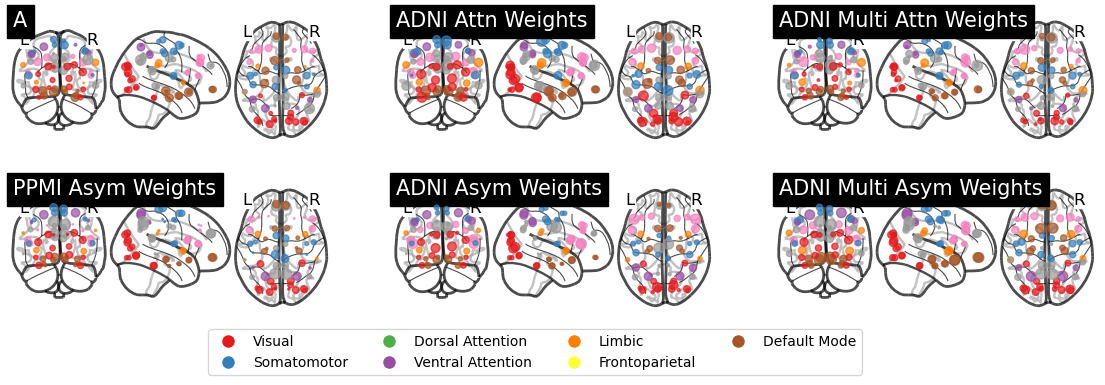

In [50]:
# Create a figure with 2 columns and 3 rows
fig, axs = plt.subplots(2, 3, figsize=(14, 4))

# Plot each brain in a subplot
plot_brain_weights(ppmi_corr_weights_gcn, fig, axs[0, 0], 'A') # 'PPMI Attn Weights'
plot_brain_weights(adni_corr_weights_gcn, fig, axs[0, 1], 'B') # 'ADNI Attn Weights'
plot_brain_weights(adni_multi_corr_weights_gcn, fig, axs[0, 2], 'C') # 'ADNI Multi Attn Weights'
plot_brain_weights(ppmi_asym_weights_gcn, fig, axs[1, 0], 'D') # 'PPMI Asym Weights'
plot_brain_weights(adni_asym_weights_gcn, fig, axs[1, 1], 'E') # 'ADNI Asym Weights'
plot_brain_weights(adni_multi_asym_weights_gcn, fig, axs[1, 2], 'F') # 'ADNI Multi Asym Weights'

# Adjust layout to avoid overlap
# plt.tight_layout()

# Fine-tune spacing between plots using subplots_adjust
# plt.subplots_adjust(top=0.5, bottom=-0.5, wspace=0.005, hspace=0.005)  # Reduce space between plots

# Add the legend to the figure (outside the subplots)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Set1(0), markersize=10, label='Visual'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Set1(1), markersize=10, label='Somatomotor'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Set1(2), markersize=10, label='Dorsal Attention'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Set1(3), markersize=10, label='Ventral Attention'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Set1(4), markersize=10, label='Limbic'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Set1(5), markersize=10, label='Frontoparietal'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Set1(6), markersize=10, label='Default Mode')
]

# Place the legend below the plots
fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)

# Show the plot
plt.show()

C:\Users\mosta\AppData\Local\Temp\ipykernel_10912\1093349223.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1', 7)  # Use 8 distinct colors to avoid color mismatch


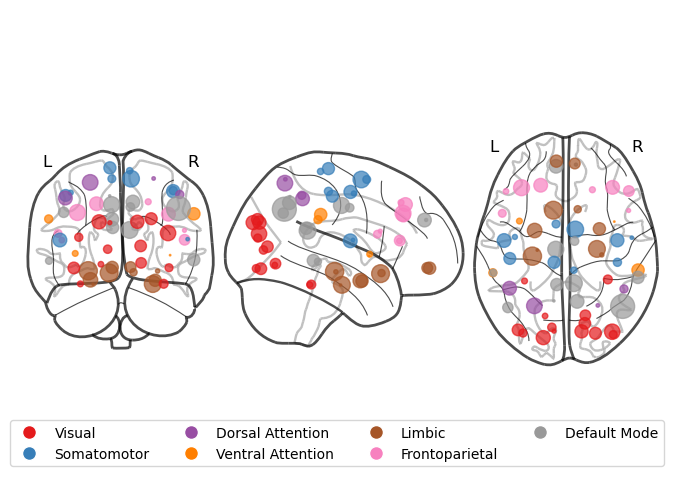

In [3]:
node_coords = plotting.find_parcellation_cut_coords(datasets.fetch_atlas_aal()['maps'])
# Example data (replace with your actual data)
node_sizes = np.array(ppmi_corr_weights_gcn)
# Initialize color array for all nodes (default is white)
node_colors = np.zeros(n_nodes)

# Assign unique colors (arbitrary values) to each group
node_colors[visual] = 1  # Visual group (e.g., red)
node_colors[somatomotor] = 2  # Somatomotor group (e.g., green)
node_colors[dorsal_attention] = 3  # Dorsal Attention group (e.g., blue)
node_colors[ventral_attention] = 4  # Ventral Attention group (e.g., yellow)
node_colors[limbic] = 5  # Limbic group (e.g., purple)
node_colors[frontoparietal] = 6  # Frontoparietal group (e.g., cyan)
node_colors[default_mode] = 7  # Default Mode group (e.g., orange)

# Normalize node sizes to a range [10, 100] for better visualization
scaler = MinMaxScaler(feature_range=(1, 10))
node_sizes = scaler.fit_transform(node_sizes.reshape(-1, 1)).flatten() **2.5

# Filter out nodes where node_colors == 0
valid_indices = node_colors != 0


# Filter out nodes based on the mask
node_coords = node_coords[valid_indices]
node_sizes = node_sizes[valid_indices]
node_colors = node_colors[valid_indices]
# Print the unique node colors to diagnose
# Define color mapping (using a colormap from matplotlib)
cmap = plt.cm.get_cmap('Set1', 7)  # Use 8 distinct colors to avoid color mismatch

# Create the plot for the nodes
fig, ax = plt.subplots()
display = plotting.plot_markers(node_colors, node_coords, node_size=node_sizes, node_cmap=cmap, figure=fig, colorbar=False, title='PPMI Attn Weights')

# Remove x and y axes (hide ticks, labels, etc.)
ax.set_axis_off()

# Custom legend to dynamically match the color groups present in the plot
legend_elements = []
# Define labels for each color group
group_labels = {
    1: 'Visual',
    2: 'Somatomotor',
    3: 'Dorsal Attention',
    4: 'Ventral Attention',
    5: 'Limbic',
    6: 'Frontoparietal',
    7: 'Default Mode'
}

# Add only the groups that are present in the filtered node colors
for color_val in np.unique(node_colors):
    legend_elements.append(
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(int(color_val-1)), markersize=10, label=group_labels[int(color_val)])
    )

# Add the legend to the plot, starting from the left
ax.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(-0.2, -0.1), ncol=4)

# Show the plot
plotting.show()

C:\Users\mosta\AppData\Local\Temp\ipykernel_10912\2109598766.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1', 7)  # Use 8 distinct colors to avoid color mismatch


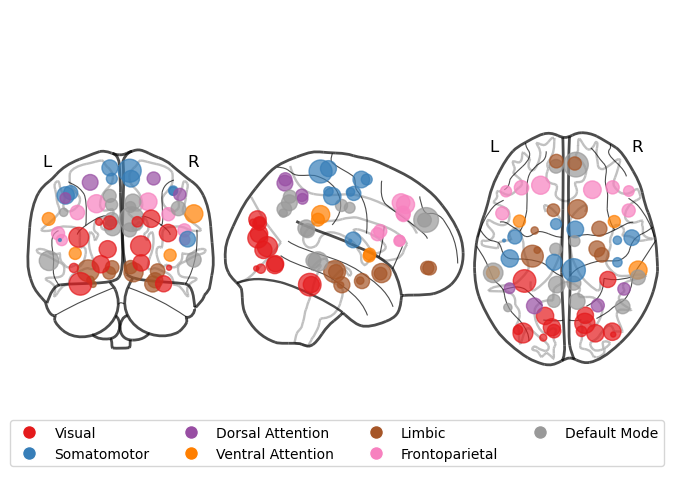

In [4]:
node_coords = plotting.find_parcellation_cut_coords(datasets.fetch_atlas_aal()['maps'])
# Example data (replace with your actual data)
node_sizes = np.array(adni_corr_weights_gcn)

# Initialize color array for all nodes (default is white)
node_colors = np.zeros(n_nodes)

# Assign unique colors (arbitrary values) to each group
node_colors[visual] = 1  # Visual group (e.g., red)
node_colors[somatomotor] = 2  # Somatomotor group (e.g., green)
node_colors[dorsal_attention] = 3  # Dorsal Attention group (e.g., blue)
node_colors[ventral_attention] = 4  # Ventral Attention group (e.g., yellow)
node_colors[limbic] = 5  # Limbic group (e.g., purple)
node_colors[frontoparietal] = 6  # Frontoparietal group (e.g., cyan)
node_colors[default_mode] = 7  # Default Mode group (e.g., orange)

# Normalize node sizes to a range [10, 100] for better visualization
scaler = MinMaxScaler(feature_range=(1, 10))
node_sizes = scaler.fit_transform(node_sizes.reshape(-1, 1)).flatten() **2.5

# Filter out nodes where node_colors == 0
valid_indices = node_colors != 0

# Filter out nodes based on the mask
node_coords = node_coords[valid_indices]
node_sizes = node_sizes[valid_indices]
node_colors = node_colors[valid_indices]
# Print the unique node colors to diagnose
# Define color mapping (using a colormap from matplotlib)
cmap = plt.cm.get_cmap('Set1', 7)  # Use 8 distinct colors to avoid color mismatch

# Create the plot for the nodes
fig, ax = plt.subplots()
display = plotting.plot_markers(node_colors, node_coords, node_size=node_sizes, node_cmap=cmap, figure=fig, colorbar=False, title='ADNI Attn Weights')

# Remove x and y axes (hide ticks, labels, etc.)
ax.set_axis_off()

# Custom legend to dynamically match the color groups present in the plot
legend_elements = []
# Define labels for each color group
group_labels = {
    1: 'Visual',
    2: 'Somatomotor',
    3: 'Dorsal Attention',
    4: 'Ventral Attention',
    5: 'Limbic',
    6: 'Frontoparietal',
    7: 'Default Mode'
}

# Add only the groups that are present in the filtered node colors
for color_val in np.unique(node_colors):
    legend_elements.append(
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(int(color_val-1)), markersize=10, label=group_labels[int(color_val)])
    )

# Add the legend to the plot, starting from the left
ax.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(-0.2, -0.1), ncol=4)

# Show the plot
plotting.show()

C:\Users\mosta\AppData\Local\Temp\ipykernel_10912\461090044.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1', 7)  # Use 8 distinct colors to avoid color mismatch


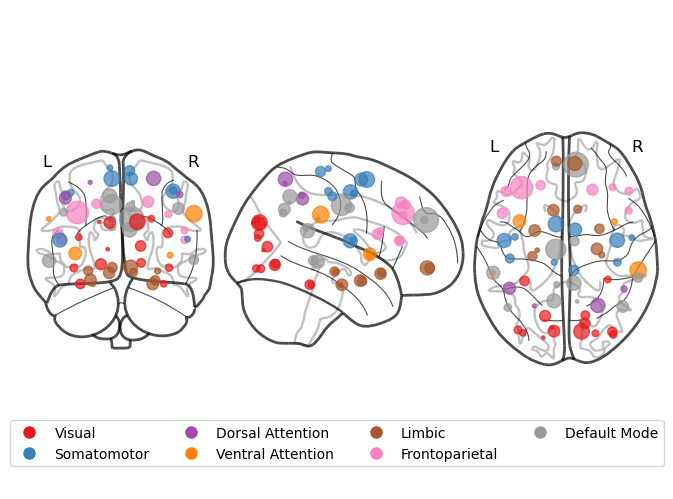

In [5]:
node_coords = plotting.find_parcellation_cut_coords(datasets.fetch_atlas_aal()['maps'])
# Example data (replace with your actual data)
node_sizes = np.array(adni_multi_corr_weights_gcn)
# Initialize color array for all nodes (default is white)
node_colors = np.zeros(n_nodes)

# Assign unique colors (arbitrary values) to each group
node_colors[visual] = 1  # Visual group (e.g., red)
node_colors[somatomotor] = 2  # Somatomotor group (e.g., green)
node_colors[dorsal_attention] = 3  # Dorsal Attention group (e.g., blue)
node_colors[ventral_attention] = 4  # Ventral Attention group (e.g., yellow)
node_colors[limbic] = 5  # Limbic group (e.g., purple)
node_colors[frontoparietal] = 6  # Frontoparietal group (e.g., cyan)
node_colors[default_mode] = 7  # Default Mode group (e.g., orange)

# Normalize node sizes to a range [10, 100] for better visualization
scaler = MinMaxScaler(feature_range=(1, 10))
node_sizes = scaler.fit_transform(node_sizes.reshape(-1, 1)).flatten() **2.5

# Filter out nodes where node_colors == 0
valid_indices = node_colors != 0


# Filter out nodes based on the mask
node_coords = node_coords[valid_indices]
node_sizes = node_sizes[valid_indices]
node_colors = node_colors[valid_indices]
# Print the unique node colors to diagnose
# Define color mapping (using a colormap from matplotlib)
cmap = plt.cm.get_cmap('Set1', 7)  # Use 8 distinct colors to avoid color mismatch

# Create the plot for the nodes
fig, ax = plt.subplots()
display = plotting.plot_markers(node_colors, node_coords, node_size=node_sizes, node_cmap=cmap, figure=fig, colorbar=False, title='ADNI Multi Attn Weights')

# Remove x and y axes (hide ticks, labels, etc.)
ax.set_axis_off()

# Custom legend to dynamically match the color groups present in the plot
legend_elements = []
# Define labels for each color group
group_labels = {
    1: 'Visual',
    2: 'Somatomotor',
    3: 'Dorsal Attention',
    4: 'Ventral Attention',
    5: 'Limbic',
    6: 'Frontoparietal',
    7: 'Default Mode'
}

# Add only the groups that are present in the filtered node colors
for color_val in np.unique(node_colors):
    legend_elements.append(
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(int(color_val-1)), markersize=10, label=group_labels[int(color_val)])
    )

# Add the legend to the plot, starting from the left
ax.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(-0.2, -0.1), ncol=4)

# Show the plot
plotting.show()

C:\Users\mosta\AppData\Local\Temp\ipykernel_10912\1539489150.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1', 7)  # Use 8 distinct colors to avoid color mismatch


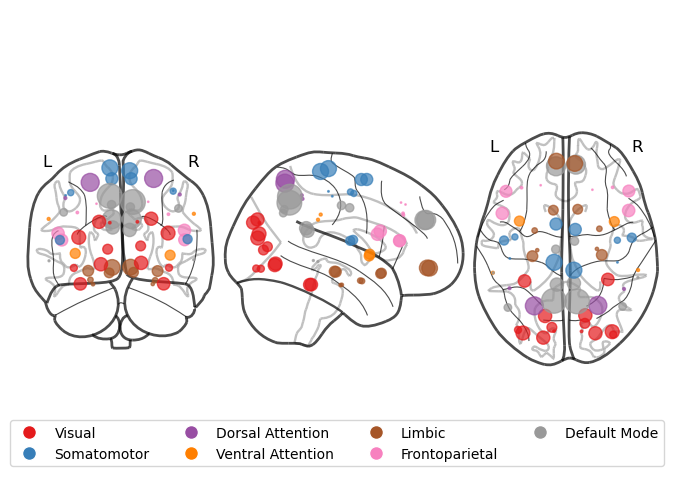

In [6]:
node_coords = plotting.find_parcellation_cut_coords(datasets.fetch_atlas_aal()['maps'])
# Example data (replace with your actual data)
node_sizes = np.array(ppmi_asym_weights_gcn)

# Initialize color array for all nodes (default is white)
node_colors = np.zeros(n_nodes)

# Assign unique colors (arbitrary values) to each group
node_colors[visual] = 1  # Visual group (e.g., red)
node_colors[somatomotor] = 2  # Somatomotor group (e.g., green)
node_colors[dorsal_attention] = 3  # Dorsal Attention group (e.g., blue)
node_colors[ventral_attention] = 4  # Ventral Attention group (e.g., yellow)
node_colors[limbic] = 5  # Limbic group (e.g., purple)
node_colors[frontoparietal] = 6  # Frontoparietal group (e.g., cyan)
node_colors[default_mode] = 7  # Default Mode group (e.g., orange)

# Normalize node sizes to a range [10, 100] for better visualization
scaler = MinMaxScaler(feature_range=(1, 10))
node_sizes = scaler.fit_transform(node_sizes.reshape(-1, 1)).flatten() **2.5

# Filter out nodes where node_colors == 0
valid_indices = node_colors != 0

# Filter out nodes based on the mask
node_coords = node_coords[valid_indices]
node_sizes = node_sizes[valid_indices]
node_colors = node_colors[valid_indices]
# Print the unique node colors to diagnose
# Define color mapping (using a colormap from matplotlib)
cmap = plt.cm.get_cmap('Set1', 7)  # Use 8 distinct colors to avoid color mismatch

# Create the plot for the nodes
fig, ax = plt.subplots()
display = plotting.plot_markers(node_colors, node_coords, node_size=node_sizes, node_cmap=cmap, figure=fig, colorbar=False, title='PPMI Asym Weights')

# Remove x and y axes (hide ticks, labels, etc.)
ax.set_axis_off()

# Custom legend to dynamically match the color groups present in the plot
legend_elements = []
# Define labels for each color group
group_labels = {
    1: 'Visual',
    2: 'Somatomotor',
    3: 'Dorsal Attention',
    4: 'Ventral Attention',
    5: 'Limbic',
    6: 'Frontoparietal',
    7: 'Default Mode'
}

# Add only the groups that are present in the filtered node colors
for color_val in np.unique(node_colors):
    legend_elements.append(
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(int(color_val-1)), markersize=10, label=group_labels[int(color_val)])
    )

# Add the legend to the plot, starting from the left
ax.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(-0.2, -0.1), ncol=4)

# Show the plot
plotting.show()

C:\Users\mosta\AppData\Local\Temp\ipykernel_10912\2264002049.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1', 7)  # Use 8 distinct colors to avoid color mismatch


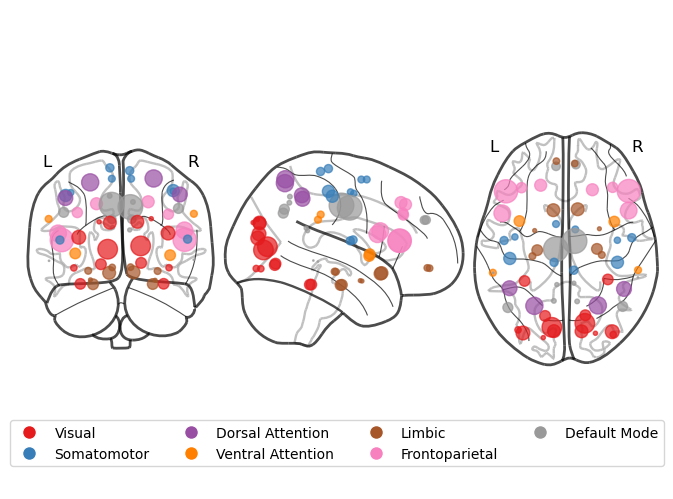

In [7]:
node_coords = plotting.find_parcellation_cut_coords(datasets.fetch_atlas_aal()['maps'])
# Example data (replace with your actual data)
node_sizes = np.array(adni_asym_weights_gcn)

# Initialize color array for all nodes (default is white)
node_colors = np.zeros(n_nodes)

# Assign unique colors (arbitrary values) to each group
node_colors[visual] = 1  # Visual group (e.g., red)
node_colors[somatomotor] = 2  # Somatomotor group (e.g., green)
node_colors[dorsal_attention] = 3  # Dorsal Attention group (e.g., blue)
node_colors[ventral_attention] = 4  # Ventral Attention group (e.g., yellow)
node_colors[limbic] = 5  # Limbic group (e.g., purple)
node_colors[frontoparietal] = 6  # Frontoparietal group (e.g., cyan)
node_colors[default_mode] = 7  # Default Mode group (e.g., orange)

# Normalize node sizes to a range [10, 100] for better visualization
scaler = MinMaxScaler(feature_range=(1, 10))
node_sizes = scaler.fit_transform(node_sizes.reshape(-1, 1)).flatten() **2.5

# Filter out nodes where node_colors == 0
valid_indices = node_colors != 0

# Filter out nodes based on the mask
node_coords = node_coords[valid_indices]
node_sizes = node_sizes[valid_indices]
node_colors = node_colors[valid_indices]
# Print the unique node colors to diagnose
# Define color mapping (using a colormap from matplotlib)
cmap = plt.cm.get_cmap('Set1', 7)  # Use 8 distinct colors to avoid color mismatch

# Create the plot for the nodes
fig, ax = plt.subplots()
display = plotting.plot_markers(node_colors, node_coords, node_size=node_sizes, node_cmap=cmap, figure=fig, colorbar=False, title='ADNI Asym Weights')

# Remove x and y axes (hide ticks, labels, etc.)
ax.set_axis_off()

# Custom legend to dynamically match the color groups present in the plot
legend_elements = []
# Define labels for each color group
group_labels = {
    1: 'Visual',
    2: 'Somatomotor',
    3: 'Dorsal Attention',
    4: 'Ventral Attention',
    5: 'Limbic',
    6: 'Frontoparietal',
    7: 'Default Mode'
}

# Add only the groups that are present in the filtered node colors
for color_val in np.unique(node_colors):
    legend_elements.append(
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(int(color_val-1)), markersize=10, label=group_labels[int(color_val)])
    )

# Add the legend to the plot, starting from the left
ax.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(-0.2, -0.1), ncol=4)

# Show the plot
plotting.show()

C:\Users\mosta\AppData\Local\Temp\ipykernel_10912\3472378949.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1', 7)  # Use 8 distinct colors to avoid color mismatch


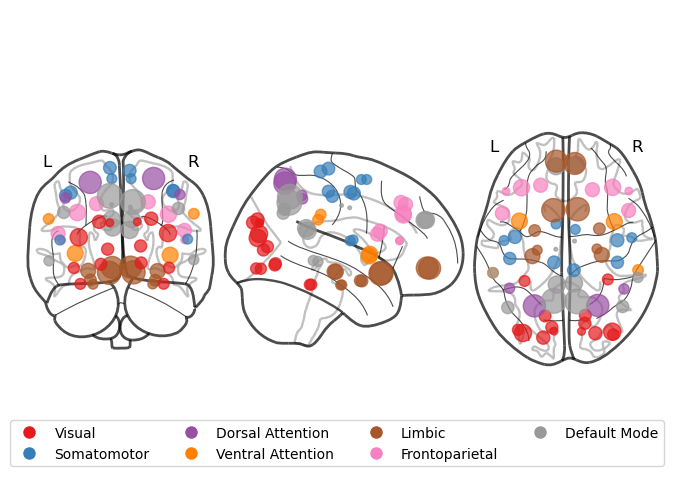

In [8]:
node_coords = plotting.find_parcellation_cut_coords(datasets.fetch_atlas_aal()['maps'])
# Example data (replace with your actual data)
node_sizes = np.array(adni_multi_asym_weights_gcn)
# Initialize color array for all nodes (default is white)
node_colors = np.zeros(n_nodes)

# Assign unique colors (arbitrary values) to each group
node_colors[visual] = 1  # Visual group (e.g., red)
node_colors[somatomotor] = 2  # Somatomotor group (e.g., green)
node_colors[dorsal_attention] = 3  # Dorsal Attention group (e.g., blue)
node_colors[ventral_attention] = 4  # Ventral Attention group (e.g., yellow)
node_colors[limbic] = 5  # Limbic group (e.g., purple)
node_colors[frontoparietal] = 6  # Frontoparietal group (e.g., cyan)
node_colors[default_mode] = 7  # Default Mode group (e.g., orange)

# Normalize node sizes to a range [10, 100] for better visualization
scaler = MinMaxScaler(feature_range=(1, 10))
node_sizes = scaler.fit_transform(node_sizes.reshape(-1, 1)).flatten() **2.5

# Filter out nodes where node_colors == 0
valid_indices = node_colors != 0


# Filter out nodes based on the mask
node_coords = node_coords[valid_indices]
node_sizes = node_sizes[valid_indices]
node_colors = node_colors[valid_indices]
# Print the unique node colors to diagnose
# Define color mapping (using a colormap from matplotlib)
cmap = plt.cm.get_cmap('Set1', 7)  # Use 8 distinct colors to avoid color mismatch

# Create the plot for the nodes
fig, ax = plt.subplots()
display = plotting.plot_markers(node_colors, node_coords, node_size=node_sizes, node_cmap=cmap, figure=fig, colorbar=False, title='ADNI Multi Asym Weights')

# Remove x and y axes (hide ticks, labels, etc.)
ax.set_axis_off()

# Custom legend to dynamically match the color groups present in the plot
legend_elements = []
# Define labels for each color group
group_labels = {
    1: 'Visual',
    2: 'Somatomotor',
    3: 'Dorsal Attention',
    4: 'Ventral Attention',
    5: 'Limbic',
    6: 'Frontoparietal',
    7: 'Default Mode'
}

# Add only the groups that are present in the filtered node colors
for color_val in np.unique(node_colors):
    legend_elements.append(
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(int(color_val-1)), markersize=10, label=group_labels[int(color_val)])
    )

# Add the legend to the plot, starting from the left
ax.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(-0.2, -0.1), ncol=4)

# Show the plot
plotting.show()